<a href="https://colab.research.google.com/github/viraj-kulkarni1125/UTS_ML2019_ID12556407/blob/master/A2_12556407_13372127.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link to notebook: https://github.com/viraj-kulkarni1125/UTS_ML2019_ID12556407/blob/master/A2_12556407_13372127.ipynb

# 31005: Advanced Data Analytics - Assessment 2: Practical Machine Learning Project

**Student #1 Number**: 12556407 

**Student #1 Name**: Viraj Kulkarni

---------------------------------------
**Student #2 Number**: 13372127

**Student #2 Name**: Prosper Mwakyusa



# Introduction

**Define problem**

---



The problem that we have chosen to analyse is the issue of accurately determining the socio-economic status of a country. That is, how developed a country is. More specifically, we seek to understand the key influencers that assess the level of development of a country. 

There were a total of 16 features to analyse. The data set that we sourced and referenced for our testing was found on Kaggle. Its original purpose was to help discern the following few things and their connection to the life expectancy rates of a country. These items can be generally classified as:

• Economic factors 
• Social factors
• Health factors
• Whether or not economic status directly links to a higher or lower life expectancy.

The maturity of this data set meant that we did not need to implement too many changes in order to predict a new feature (Country Classification) and analyse its accuracy.
We elected to deploy a classification model because it best suited the nature of our project. Classification aims to assign features with a selection of discrete labels/values as opposed to a regression model which aims to assign features with real numerical values.





The significance of this problem is such that previously, we were unable to depict how some variables play a significant role in determining the classification of a country. By deploying this algorithm, we hope to discover key influencers that shape the socio-economic dynamic of the country. Perhaps, in the future, more features can get added to the data set for the purposes of strengthening the algorithm in order to provide more accurate results, not just amongst split data sets but also in the real world.



The current algorithm produces a model that is capable of predicting the level of development of countries around the world over 15 year period. The algorithm does this by utilising existing data from a datasheet that was gathered from Kaggle. It then produces a model to predict the already known results. This will involve splitting the one dataset into two. The expected outputs are the classification of the countries based on the level of development, such as "developing" and "developed". This is represented as integers.

The current dataset consists of 22 columns. Sixteen of which are used to predict the values in one separate column. The 13 that are used are life expectancy, adult mortality, infant deaths, alcohol, percentage expenditure, Hepatitis B, Measles, under-five deaths, Polio, total expenditure, Diphtheria, HIV/AIDS, GDP, thinness 1-19 years, thinness 5-9 years, and income composition of resources.

These columns can be considered to be ambiguous due to the name of the column and the depiction of which it is represented. Life expectancy is the average amount of time that a person in a country is expected to live up to, adult mortality is the probability that a 15-year-old will die before reaching their 60th birthday. This is represented as per 1000 people. Infant deaths refer to the number of deaths for those younger than one year old. This is represented as per 1000 population. The alcohol column refers to the per capita consumption of alcohol for those equal to or older than 15. This is represented as litres of pure alcohol. Percentage expenditure refers to the expenditure on health as a percentage of Gross Domestic Product (GDP) per capita. The Hepatitis B column refers to the percentage coverage of immunisation for 1-year-olds. The Measles column is the number of cases per 1000 population who have been diagnosed with Measles. Under-five deaths refers to the number of deaths that have occurred for those younger than 5-year-olds per 1000 population. The Polio column refers to the percentage coverage of immunisation for 1-year-olds. Total expenditure is the total government expenditure onto health as a percentage of the total government expenditure. The Measles column is the number of cases per 1000 population who have been diagnosed with Diphtheria tetanus toxoid and pertussis (DTP3). The HIV/AIDS column records the number of deaths per 1000 live births. The GDP column is the total GDP of a country divided by the population of that country, and this is also referred to as “GDP Per Capita.” Thinness 1-19 years is the proportion of thinness for those ages from 1-19. Thinness 5-9 years is the proportion of thinness for those ages from 5-9. Income composition of resources refers to the Human Development Index (HDI) regarding the size of the income divided by a population group. 

The dependent variable is currently a categorical variable. This consists of the classification of countries based on the level of development. The current categories are "developed country", "developing country," and "least developed country". This is represented as integers.




# Exploration

Currently, there are some challenges when using the dataset. Due to the dataset being obtained by a user from Kaggle, these challenges essentially consist of data anomalies. These data anomalies include missing values in the dataset for various columns such as "Hepatitis B" and "Diphtheria". Another data anomaly that occurs in the dataset is that in the "GDP" column, there are incorrect values. Many of the values lack a "0" value in some fields. Another challenge is the dependent variable that is being measured. This dependent variable is used to classify countries based on their development. The categories include "Developed Country," such as the U.S. and Australia, "Developing Country" such as India and China and the "Least Developed Country" such as Bangladesh and Afghanistan. Another challenge is that there is currently only one dataset rather than two datasets. The two datasets will allow for a training set and a test set. This will enable the usage of the training set to help predict results in the test set. Another challenge is the producing of the decision tree visualisation. Due to the usage of multiple variables, it is considered to be a more difficult situation in creating the visualisation.


In order to predict the categorisation of countries based on the living conditions, classification will have to be undergone. The classification method, known as decision trees, was implemented. The method will be utilised by inputting various variables and using them to develop a model that is capable of predicting the level of development of each country around the world. The project was completed utilising Google Colab, which allows for the use of Python. The dataset that is used is stored on GitHub in which Google Colab accesses directly. The libraries from Python that were used to construct the model are pandas, and sci-kit learn.

Due to the lack of a training and test dataset, the current dataset was split in which 15% of the rows were used for the test set, and the remaining 85% was used for the training set. After conducting the classification, sci-kit learn was used to produce a confusion matrix, of which contrasts the predicted results to the actual results, recording the accuracy of the model.

# Methodology

In [0]:
#Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt

#Data Preprocessing---------------------------------------------------------------------------------------
#Importing the data from GitHub and spliting it by independent and dependent variables
url="https://raw.githubusercontent.com/viraj-kulkarni1125/UTS_ML2019_ID12556407/master/Country%20Classification.csv"
dataset=pd.read_csv(url)
X=dataset.iloc[:, [2,3,4,5,6,7,8,10,11,12,13,14,15,17,18,19]].values
Y=dataset.iloc[:, [21]].values

#Fixing missing data
from sklearn.preprocessing import Imputer
cleaner = Imputer(missing_values="NaN", strategy="mean", axis=0)
cleaner  = cleaner.fit(X[:, 0:17])
X[:, 0:17] = cleaner.transform(X[:, 0:17])

#Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
Y_labelencoder = LabelEncoder()
Y = Y_labelencoder.fit_transform(Y)

#Splitting into test and training set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15)

#Classification---------------------------------------------------------------------------------------
#Fitting data to model
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth=6, min_samples_leaf=6, random_state = 0)
classifier.fit(X_train, Y_train)

#Predicting the test results
Y_pred = classifier.predict(X_test)                 

#Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
confusionmatrix = confusion_matrix(Y_test, Y_pred)
print(confusionmatrix)
print("Accuracy of the decision tree classifier is:", accuracy_score(Y_test, Y_pred))

#Visualisation---------------------------------------------------------------------------------------
# importing export_graphviz
from sklearn.tree import export_graphviz

#Exporting the decision tree to a decisiontree.dot file
export_graphviz(classifier, out_file ='decisiontree.dot', feature_names =['Life Expectancy','Adult Mortality','infant deaths', 'alcohol','percentage expenditure','Hepatitis B','Measles','under-five deaths','Polio','Total Expenditure','Diphtheria','HIV/AIDS','GDP','thinness 1-19 years','thinness 5-9 years','income composition of resources']) 

[[267  12   1]
 [ 68  67   0]
 [  7   2  17]]
Accuracy of the decision tree classifier is: 0.7959183673469388


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The code that was utilised consists of various sections. This consisted of importing the required libraries, data preprocessing, classification, and creating the visualisation.



## Importing the libraries
Importing the required libraries has allowed for the loading of the data and performing various data preprocessing methods, classification, and data visualisation. Pandas has allowed for the loading of the dataset from GitHub. The scikit-learn library had allowed for data preprocessing and classification as well as producing the confusion matrix and visualisation.

## Data Preprocessing
In regards to the data preprocessing, this involved loading the dataset, fixing the missing data, encoding categorical variables, and splitting the dataset into training and testing. When loading the dataset, the dataset was stored onto a local GitHub repository in which was extracted onto Google Colab to be utilised. The dataset was then split depending on the type of variables which were independent variables and dependent variables. Due to the need to determine development, it is considered a dependent variable. Other independent variables including measles and the status of the country were put into the other dataset labelled "X". Only the variables that contribute to a country's level of development were used, such as "GDP". Variables such as the name of the country and the year were not included due to it having any correlation to the level of development of the countries. The variables that were used are life expectancy, adult mortality, infant deaths, alcohol, percentage expenditure, hepatitis B, measles, under-five deaths, polio, total expenditure, diphtheria, HIV/AIDS and GDP.

The data consisted of many cells which lacked data. Missing data cannot be used for classification. This was fixed by using the imputer method in the scikit-learn library. This involved selecting the cells that were missing. In this case, the missing cells were represented as "NaN". These were filled in based on the average value for each country for that variable. This object was then applied to the independent variable dataset, selecting all the columns that had missing cells of data.

The current categorical variable was the "Country Classification" column, which divided a country based on whether it is developed, developing, or considered to be a least developed country. The need to encode categorical variables is due to the inability for classification models to interpret strings and so this leads to the encoding of categorical variables. This was done using ski-kit learns LabelEncoder. LabelEncoder allowed for the categorisation of the variables in which least developed countries became a "2". Developing countries were marked as "1" and developed countries were marked as "0". 

The dataset was split into the training set and the test set. This is due to the only availability of a single dataset. The training set is used to allow the model to learn and to predict the result of the test set. The overall dataset was split of which 15% of the rows were utilised in the test set and the remaining 85% was used in the training set. This was done by utilising sci-kit learns train_test_split. The parameters of the method involved inputting the independent variable and the dependent variable datasets. The parameter for "test_size" was given a value of 0.15 in order to allocate 15% of the total rows to the test set.

## Classifier
Classification utilises the data gathered and using the results to predict other outcomes. The current classification method that was used is the decision tree classifier. The algorithm was used due to the approach to undergo observations about the results and formulate a conclusion.

In the algorithm, the "tree" library was imported from sci-kit learn. The "DecisionTreeClassifer" method was then applied to the "classifier" object in which the entropy criterion was used due to entropy focusing on measuring information as compared to Gini, which utilises randomisation. For nodes, only six nodes are required at minimum and maximum. The training sets of the data are then fitted to the "classifier" object, which allows the model to undergo training of the data. Then by utilising the "classifier" object, that currently contains the data to formulate and predict test sets. The "classifier" object was then used on the test set to predict the level of development of the countries.


## Confusion Matrix
A confusion matrix is a table that allows for the visualisation of the performance of the model that was used to conduct classification. The current confusion matrix records how many variables were recorded as 0, 1, or 2. This also calculates the current accuracy rate of the model. The current accuracy is 0.795*100=79.5%

## Visualisation

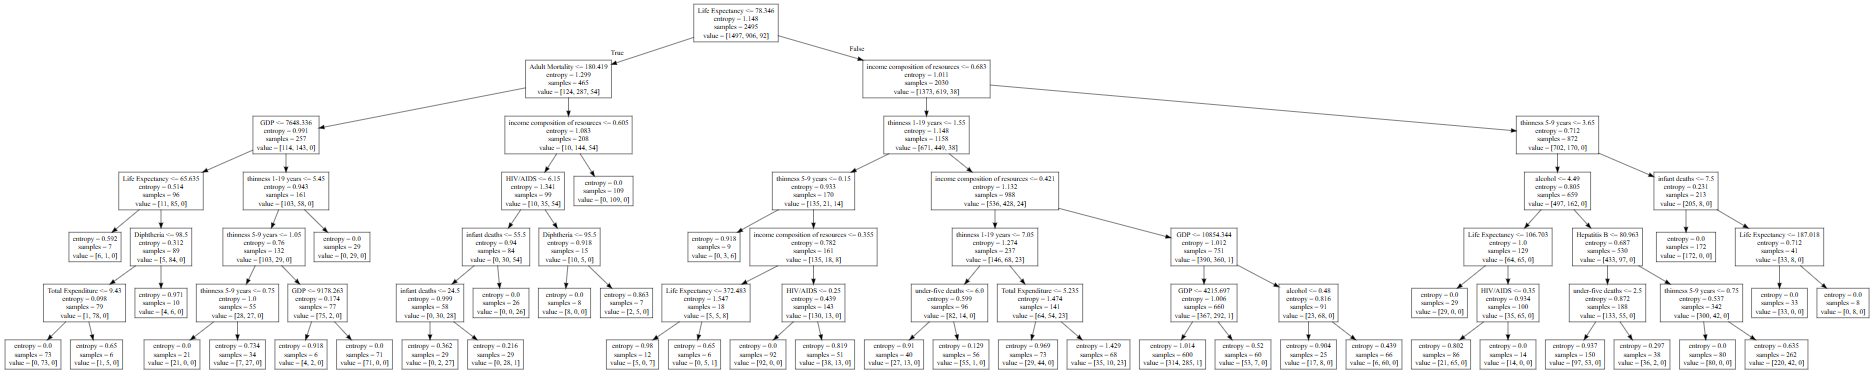

In [0]:
from IPython.display import Image
Image('Decision_Tree_Visualisation.PNG')

The current visualisation is the decision tree that was used to predict the test results. When predicting a variable, the model goes through the decision tree in order to predict it. 

The decision tree visualisation was produced by utilising sci-kit learns export_graphviz. The method involves implementing the current model that was used. This is the "classifier" object. The file is exported as a dotfile named "decisiontree.dot". This file's contents are then taken and utilised in producing the visualisation through the use of a graphviz producer. 

# Evaluation


### **Execution on data**

By using the sci-kit learn, python module, more specifically, the decision tree model, we were able to train the algorithm to predict the level of development of a country throughout a fifteen-year period. The algorithm consisted of the following few steps:

-	**Data Pre-processing**-

o *Here we selected the data to assess (X) and created a category that would reflect our findings from the other categories being assessed.*

-	**Fixed missing data**

o	*We did this by assigning ‘NaN’ values to any missing cells*

-	**Encoding categorical data**

o	*We assigned numerical values to the categorical values*


-	**Splitting the data set into a training and testing set**

-	**Implementing Decision Tree classifier onto the model**

o	*Deploy the algorithm based on the conditions specified*


**-	Outputting the results**

o	*Here we display the findings from the defined conditions*

**-	Deploying the confusion matrix**

o	*Here, the matrix would sift through the results of the decision tree and determine its accuracy. Often this is done by distinguishing positives and negatives (true) as well as false positives and false negatives (not true).*

-	Visually representing these results



Upon our testing, the results were considered to be consistent. The decision tree classifier proved convenient, and by using this model, we were able to guarantee consistent results. Upon testing, the results on both sides, the accuracy prediction score provided results varying no higher than 3% each time we ran the program. The following were the first three results generated with the current model parameters.
1. 78.097
2. 77.931
3. 79.422



**Efficiency analysis**

The decision tree model worked best for us as it is the most consistent and decisive method that was used in determining a country's classification. 

If we had hoped to achieve the highest possible accuracy results, we may have elected to use Random Forest as it is a model that utilises multiple decision trees, from which it will grab the highest possible result(s). That is, the most recurring classification among the decision trees in the forest. It does so in order to formulate an answer. 

Alternatively, we could have used kNN classification, however, this may not have been the best option as kNN classification requires you to specify the number of neighbours from which it will gather the results for a final prediction. This method can prove to be hit and miss as in a data set of this size. We may be unsure of exactly how many neighbours it takes to predict the most accurate results.


# Conclusion

In conclusion, our problem was figuring out a way to accurately determine the socio-economic status of a country based off of features from a pre-existing data set. After deliberating on a solution for our problem, we came to an agreement that we were to deploy a classification technique. The specific method that we chose to implement was the model of decision tree.

From here, we were able to follow a list of steps in order to properly and effectively deploy our model onto the data set. These steps are detailed in our 'Evaluation' section.
In essence, we were able to train a model on an existing data set to help predict the values of a new feature.

By using this model, we were able to guarantee consistent results with the accuracy prediction score varying no higher than 3% each time we ran the program.  

In the future, we would hope to improve our results by adding more features to the data set from which we could deploy a new method (possibly Random Forest). This would be done in hopes to manipulate the model parameters further and the data set while also knowing that it would guarantee the best available prediction results.

# Ethical

The ethical dilemma that we encountered when deploying this algorithm was that we might have been generalising the status of the whole country based on factors that we deemed to be crucial and determinants of the quality of life that the citizens of a given country may experience.

When it comes to the classification of these countries, some features listed on the data set that we were analysing did not necessarily testify to the quality of life experienced by the citizens of a country. In some cases, it can be argued that a statistic such as GDP may not be an important statistic. For example, in Kenya, GDP is only useful in some areas as more than 70% of Kenya's citizens live in rural areas, generally relying on farming and other agricultural techniques while coexisting with one another. 

All this is to say that a lot of these categoric features are of great importance to a large global population. However, we may often be too quick to justify that a low socio-economic state in a country as a result of one statistic such as GDP instead of finding the root cause of the flailing stat, e.g., why the GDP is low.

This data set is incomplete and does not take into account all factors that may come into play when classifying a country and so it is a gross misjudgement -to say the least- when we are quick to determine a country's classification based on figures shown by other countries. 

Objective stats and findings are essential. However, they do not always accurately portray the perspective of the citizens. A country with whose citizens have an average BMI that is above the average of its surrounding nations may not be less-learned on health and nutrition than their international counterparts. Some of these statistics are unfair as they hold countries to account by comparing them to other countries where there probably shouldn't be a comparison at all.

# Video Pitch

Video link: https://drive.google.com/open?id=17-PR1O85TqqcbknxQn_sWRy04esXLNz1